In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr
from pylab import rcParams

import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [31]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [32]:
address='C:/Users/tamon/Desktop/Python/Bank Credit Score/credit_data.csv'
credit=pd.read_csv(address)
credit.columns=['Month','Name','Age','Occupation','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Payment_of_Min_Amount','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
credit.head()

,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,October,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,13.27,4,809.98,33.053114,0,49.574949,21.465380,361.444004
1,November,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4,809.98,33.811894,0,49.574949,148.233938,264.675446
2,December,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,3,4,4,5,11.27,4,809.98,32.430559,0,49.574949,39.082511,343.826873
3,October,Rick Rothackerj,28,Teacher,34847.84,3037.986667,2,4,6,1,3,3,5.42,5,605.03,30.116600,0,18.816215,251.627369,303.355083
4,October,Langep,35,Engineer,143162.64,12187.220000,1,5,8,3,6,3,2.10,3,1303.01,35.685836,0,246.992320,453.615131,788.114550


In [33]:
credit.columns
cols=['Monthly_Inhand_Salary','Outstanding_Debt']
credit_data=credit[cols]
y=credit.iloc[:,16].values
print(y)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]


<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Outstanding_Debt'>

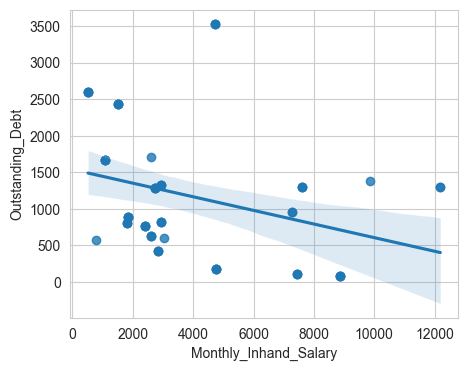

In [34]:
# Independent variable showing not much dependence to determine the payment default
sb.regplot(x='Monthly_Inhand_Salary',y='Outstanding_Debt',data=credit,scatter=True)

In [35]:
Monthly_Inhand_Salary=credit['Monthly_Inhand_Salary']
Outstanding_Debt=credit['Outstanding_Debt']
spearmanr_coefficient,p_value=spearmanr(Monthly_Inhand_Salary,Outstanding_Debt)
print('Correlation Coeff %0.3f'%(spearmanr_coefficient))

Correlation Coeff -0.411


In [36]:
# Removing the emplhy values
credit.isnull().sum()

Month                       0
Name                        0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64

In [24]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     64 non-null     object 
 1   Name                      64 non-null     object 
 2   Age                       64 non-null     int64  
 3   Occupation                64 non-null     object 
 4   Annual_Income             64 non-null     object 
 5   Monthly_Inhand_Salary     64 non-null     float64
 6   Num_Bank_Accounts         64 non-null     int64  
 7   Num_Credit_Card           64 non-null     int64  
 8   Interest_Rate             64 non-null     int64  
 9   Num_of_Loan               64 non-null     int64  
 10  Delay_from_due_date       64 non-null     int64  
 11  Num_of_Delayed_Payment    64 non-null     int64  
 12  Changed_Credit_Limit      64 non-null     float64
 13  Num_Credit_Inquiries      64 non-null     int64  
 14  Outstanding_

In [29]:
X=scale(credit_data)
print(X)

[[-0.70494129 -0.41174787]
 [-0.70494129 -0.41174787]
 [-0.70494129 -0.41174787]
 [-0.2906119  -0.64349842]
 [ 2.83416008  0.14575383]
 [ 2.83416008  0.14575383]
 [-0.43593309 -0.6124815 ]
 [-0.43593309 -0.6124815 ]
 [-0.43593309 -0.6124815 ]
 [-0.43640298  0.59938334]
 [ 2.03382611  0.23025599]
 [-0.36327435 -0.8511071 ]
 [-0.36327435 -0.8511071 ]
 [-0.36327435 -0.8511071 ]
 [-0.32113847  0.17506329]
 [-0.32113847  0.17506329]
 [-0.32113847  0.17506329]
 [ 1.15363187 -0.2530109 ]
 [ 1.15363187 -0.2530109 ]
 [ 0.29979522 -1.12499   ]
 [ 0.29979522 -1.12499   ]
 [ 0.29979522 -1.12499   ]
 [ 0.29979522 -1.12499   ]
 [-1.15088689  1.61538814]
 [-1.15088689  1.61538814]
 [-1.15088689  1.61538814]
 [-1.15088689  1.61538814]
 [-0.50309086 -0.47002756]
 [-0.50309086 -0.47002756]
 [-0.50309086 -0.47002756]
 [-0.50309086 -0.47002756]
 [-0.32334393 -0.40243035]
 [-0.32334393 -0.40243035]
 [-0.32334393 -0.40243035]
 [ 1.26459733  0.13855085]
 [ 1.26459733  0.13855085]
 [ 1.26459733  0.13855085]
 

In [26]:
LogReg=LogisticRegression()
LogReg.fit(X,y)
print(LogReg.score(X,y))

0.625


In [27]:
y_pred=LogReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred)) # Good Precision & recall rate to determine Payment_of_Min_Amount

              precision    recall  f1-score   support

           0       0.46      0.26      0.33        23
           1       0.67      0.83      0.74        41

    accuracy                           0.62        64
   macro avg       0.56      0.55      0.54        64
weighted avg       0.59      0.62      0.59        64

